In [35]:
from matplotlib import pyplot as plt
import numpy as np
import sympy 
from sympy import Matrix 
from fractions import Fraction 
import math


<div style="color:pink">

#### Bài 1:

Kiểm tra tính lồi/ lõm và tìm cực trị toàn cục nếu có của hàm $\mathcal{f(x)}$ = $x^TAx + q^Tx + 1$  với x = ($x_1, x_2, x_3$), </br></br>

<div align="center">

A = $\begin{bmatrix}
1 & -2 & 1 \\
-2 & 1 & -2 \\
1 & -2 & 1 \\
\end{bmatrix}$ và $q = \begin{bmatrix}
                        1 \\ 2 \\ -1 \\
                        \end{bmatrix}$

</div>

</div>

`Solution:` </br> </br>
Để kiểm tra tính lồi lõm của hàm $\mathcal{f}$, ta tìm các trị riêng của ma trận A và kiểm tra xem tất cả có không âm hay không như sau: 

In [110]:
A = np.array([[1,-2,1],[-2,1,-2],[1,-2,1]])
A

array([[ 1, -2,  1],
       [-2,  1, -2],
       [ 1, -2,  1]])

In [111]:
eigenvalues = np.linalg.eig(A)[0]
print(eigenvalues)


rounded_eigenvalue = np.round(eigenvalues, decimals=2)
print(rounded_eigenvalue)


[ 4.37228132e+00 -1.11548217e-16 -1.37228132e+00]
[ 4.37 -0.   -1.37]


Do các giá trị riêng của A có cả giá trị âm, dương và 0 nên ma trận A là ma trận không xác định. 
Do đó không thể xác định tính lồi lõm của hàm $\mathcal{f}$ và không thể xác định cực trị toàn cục của hàm.

<div style="color: pink">

#### Bài 2: 
Một người đi xạ trị bệnh bằng việc bơm thuốc vào người. Khi vừa xạ trị xong, lượng thuốc tồn động trong người ở mức 10 đơn vị. Sau đó 1h sau lượng thuốc còn lại là 8; lần lượt 2, 3, 4 giờ sau lượng thuốc còn lại là 7, 5 và 2.</br> </br>
Hãy viết các lệnh Python để tìm phương trình tuyến tính bằng phương pháp bình phương tối tiểu với tập các cặp số (x, y) như bên dưới để tìm công thức giảm lượng thuốc đối với bệnh nhân theo thời gian:
<div align = "center">
    (x, y) = {(0, 10), (1, 8), (2, 7), (3, 5), (4, 2)}
</div>

</div>

`Solution:` </br> </br>

Giả sử phương trình tuyến tình là $y = ax + b$ </br>
Ta có bảng dữ liệu : </br>
<div align="center">

| x | 0 | 1 | 2 | 3 |4 |
| ---|---|---|---|---|---|
| y | 10 | 8 | 7 | 5 | 2|

</div>
</br>

Ycbt $\Leftrightarrow$ tìm nghiệm bình phương tối tiểu của $Ax = b$ với ma trận A và vector b như sau: </br>
<div align="center">

$A = \begin{bmatrix}
    0 & 1 \\
    1 & 1 \\
    2 & 1 \\
    3 & 1 \\
    4 & 1 \\
\end{bmatrix}$ , $b = \begin{bmatrix}
                        10 \\
                        8 \\
                        7 \\
                        5 \\
                        2 \\
                    \end{bmatrix}$

</div>

In [166]:
A = np.array([[0,1],[1,1],[2,1],[3,1],[4,1]])
b = np.array([[10],[8],[7],[5],[2]])
print(A)
print(b)

[[0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]]
[[10]
 [ 8]
 [ 7]
 [ 5]
 [ 2]]


Tính tích $A^TA$ và gán cho ma trận X.

In [167]:
X = np.matmul(np.transpose(A), A)
X

array([[30, 10],
       [10,  5]])

Tính tích $A^Tb$ và gán cho ma trận Y.

In [168]:
Y = np.matmul(np.transpose(A), b)
Y

array([[45],
       [32]])

Tính nghiệm bình phương tối tiểu:

In [169]:
x_sol_square = np.matmul(np.linalg.inv(X), Y)
x_sol_square

array([[-1.9],
       [10.2]])

Vậy nghiệm bình phương tối tiểu của $Ax = b$ là $x_0$ = $\left(\frac{-19}{10}, \frac{51}{5}\right)$ </br> </br>
$\rightarrow$ Phương trình tuyến tính cần tìm là $y = \frac{-19x}{10} + \frac{51}{5}$

<div style="color:pink">

#### Bài 3:
Một thí nghiệm xét mối liên hệ giữa độ giảm trọng lượng của hợp chất (y, tính bằng gam) và khoảng thời gian mà hợp chất tiếp xúc với không khí (x, tính bằng năm), trong đó số âm có thể hiểu là giai đoạn xử lý nguyên liệu, trước khi điều chế ra hợp chất. Ta có bảng dữ liệu như sau: </br>
<div align="center">

| x | -2 | 0 | 1 | 2 | 4|
|------|------|------|-----|------|------|
| y | -1 | 1.5 | 3.1 | 6.3 | 11.1|

</div>

a) Giả sử x, y thỏa mãn mô hình $y = a + bx + c\ln(x^2 + 1)$. Hãy sử dụng phương pháp bình phương cực tiểu, ước lượng các tham số a, b, c. </br> </br>
b) Vẽ đồ thị cho dữ liệu. Sử dụng kết quả trên để dự đoán y khi x = 6.5. </br> </br>
c) Hỏi có nên dùng mô hình $y = a + bx + c\ln(x)$ hoặc $y = a + bx + \frac{c}{x}$ để xấp xỉ dữ liệu trên không? Vì sao?

</div>

`Solution:` </br> 

`a)` </br>
Mô hình $y = a + bx + c\ln(x^2 + 1)$ : </br>


Giải bài toán tìm nghiệm bình phương cực tiểu $Ax = b$ với : </br>

<div align="center">

$A = \begin{bmatrix}
      1 & -2 & \ln((-2)^2 + 1) \\
      1 & 0 & \ln(0^2 + 1) \\
      1 & 1 & \ln(1^2 + 1) \\
      1 & 2 & \ln(2^2 + 1) \\
      1 & 4 & \ln(4^2 + 1) \\
      \end{bmatrix} $, $b = \begin{bmatrix}
        -1 \\
        1.5 \\
        3.1 \\
        6.3 \\
        11.1 \\
        \end{bmatrix}$

</div>

In [170]:
x = np.array([[-2],[0],[1],[2],[4]])
x

array([[-2],
       [ 0],
       [ 1],
       [ 2],
       [ 4]])

Duyệt qua x và tạo ma trận A với số hàng bằng số hàng của x và 3 cột :
- Cột thứ nhất là hệ số của a : 1
- Cột thứ hai là hệ số của b : x
- Cột thứ ba là hệ dó của c : $\ln(x^2 + 1)$

In [171]:
# số hàng của x
nr = len(x)
print("Số hàng: ", nr)

# khởi tạo ma trận nr hàng, 3 cột
A = np.zeros((nr, 3))
print("Sau khi khởi tạo ma trận A: ")
print(A)

for i in range(nr):
    A[i][0] = 1
    A[i][1] = x[i]
    A[i][2] = math.log(x[i] ** 2 + 1)
print("Ma trận A: ")
print(A)
    

Số hàng:  5
Sau khi khởi tạo ma trận A: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Ma trận A: 
[[ 1.         -2.          1.60943791]
 [ 1.          0.          0.        ]
 [ 1.          1.          0.69314718]
 [ 1.          2.          1.60943791]
 [ 1.          4.          2.83321334]]


In [172]:
b = np.array([[-1],[1.5],[3.1],[6.3],[11.1]])
print(b)

[[-1. ]
 [ 1.5]
 [ 3.1]
 [ 6.3]
 [11.1]]


Tính tích $A^TA$ và gán cho ma trận X:

In [173]:
X = np.matmul(np.transpose(A), A)
X

array([[ 5.        ,  5.        ,  6.74523635],
       [ 5.        , 25.        , 12.02600056],
       [ 6.74523635, 12.02600056, 13.68813165]])

Tính tích $A^Tb$ và gán cho ma trận Y

In [174]:
Y = np.matmul(np.transpose(A), b)
Y

array([[21.        ],
       [62.1       ],
       [42.12744531]])

Tính nghiệm bình phương tối tiểu:

In [175]:
x_sol_square = np.matmul(np.linalg.inv(X), Y)
x_sol_square

array([[1.14446483],
       [1.81151861],
       [0.92214453]])

Vậy nghiệm bình phương tối tiểu của $Ax = b$ là $x$ = $\left(1.14446483, 1.81151861, 0.92214453\right)$ </br>
$\Rightarrow$ Các tham số : </br>

<div align="center">

$a \simeq 1.14446483 \\
b \simeq 1.81151861 \\
c \simeq 0.92214453 \\ $

</div>

`b)` Vẽ đồ thị cho dữ liệu:

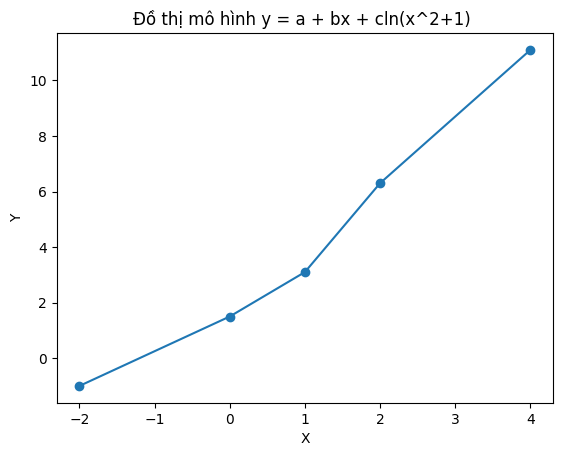

In [176]:

# Dữ liệu đã được gán phía trên , x -> x, y -> b


# Vẽ đồ thị
plt.plot(x, b, label='Đường thẳng')
plt.scatter(x, b, label='Dữ liệu', marker='o')

# Đặt tên cho trục x và trục y
plt.xlabel('X')
plt.ylabel('Y')

# Đặt tiêu đề cho đồ thị
title = 'Đồ thị mô hình y = a + bx + cln(x^2+1) '
plt.title(title)

# Hiển thị đồ thị
plt.show()

- Dự đoán y khi x = 6.5:

In [177]:
x1 = 6.5
res = x_sol_square[0] + x_sol_square[1] * x1 + x_sol_square[2] * math.log(x1 ** 2 + 1)
print("Khi x = 6.5 : y = ", res)

Khi x = 6.5 : y =  [16.39305168]


`c)` Có nên dùng mô hình $y = a + bx + c\ln(x)$ hoặc $y = a + bx + \frac{c}{x}$ để xấp xỉ dữ liệu trên không ? Vì sao?

Ta thấy, số liệu thí nghiệm có các giá trị x(tính bằng năm) có thể âm, dương và bằng 0.
- Nếu dùng mô hình $y = a + bx + c\ln(x)$ để xấp xỉ dữ liệu trên thì tại các giá trị x <= 0, giá trị của y sẽ không xác định. Vì thế ta không nên dùng mô hình này để xấp xỉ dữ liệu trên.
- Nếu dùng mô hình $y = a + bx + \frac{c}{x}$ để xấp xỉ dữ liệu trên thì tại giá trị x = 0, giá trị của y sẽ không xác định, vì thế ta không nên dùng mô hình này để xấp xỉ dữ liệu trên.

